# Regression 

# Problem Statement:

Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

Approach: The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

Results: You have to build a solution that should able to predict the sales of the
different stores of Big Mart according to the provided dataset

#Item_Weight: Weight of product

#Item_Fat_Content: Whether the product is low fat or not

#Item_Visibility: The % of total display area of all products in a store allocated to the particular product

#Item_Type: The category to which the product belongs Item_MRP: Maximum Retail Price (list price) of the product

#Outlet_Identifier: Unique store ID

#Outlet_Establishment_Year: The year in which store was established

#Outlet_Size: The size of the store in terms of ground area covered

#Outlet_Location_Type: The type of city in which the store is located

#Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome
#variable to be predicted.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Understanding

In [3]:
data.shape

(8523, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
for i in data.select_dtypes(include='object'):
    print(i)
    print(data[i].value_counts())


Item_Identifier
FDW13    10
FDG33    10
DRN47     9
FDF52     9
NCB18     9
         ..
FDO33     1
FDE52     1
DRF48     1
FDQ60     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT0

Item_Identifier


C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


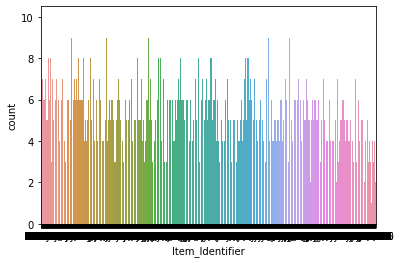

Item_Fat_Content


C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


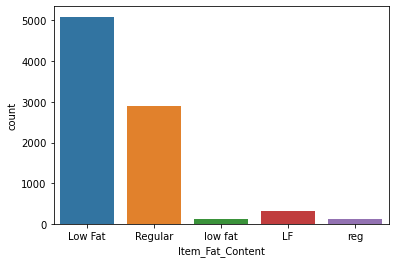

Item_Type


C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


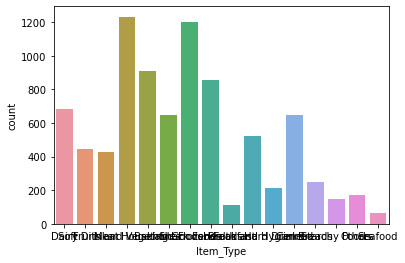

Outlet_Identifier


C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


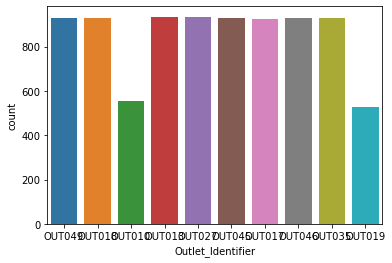

Outlet_Size


C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


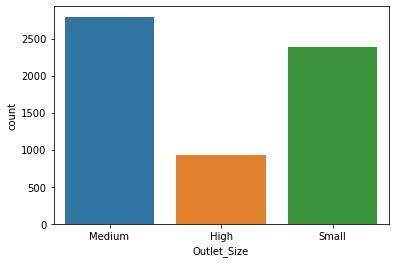

Outlet_Location_Type


C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


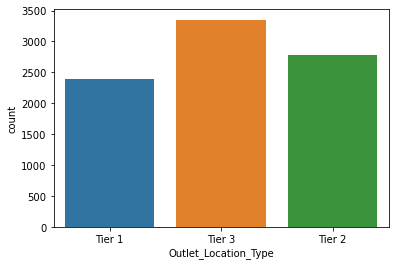

Outlet_Type


C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


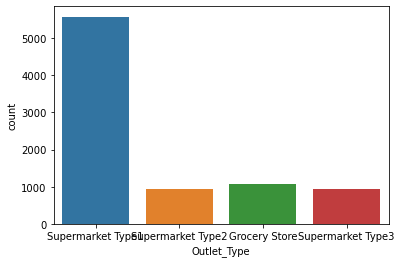

In [7]:
for i in data.select_dtypes(include='object').columns:
    print(i)
    sns.countplot(data[i])
    plt.show()

In [8]:
#Checking if any missing values and outliers:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight


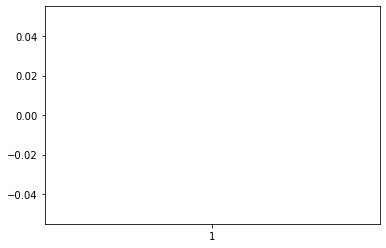

Item_Visibility


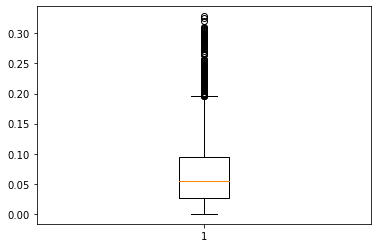

Item_MRP


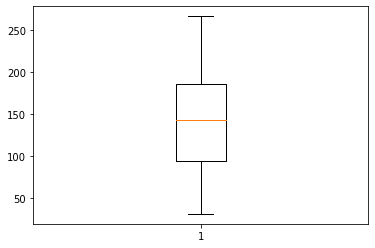

Outlet_Establishment_Year


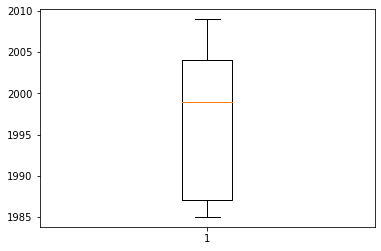

Item_Outlet_Sales


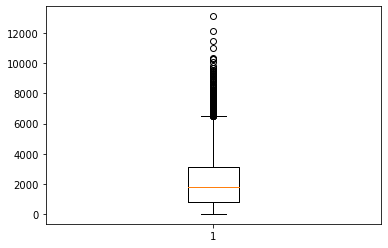

In [9]:
for i in data.select_dtypes(exclude='object').columns:
    print(i)
    plt.boxplot(data[i])
    plt.show()

In [10]:
#imputing missing values:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [11]:
data['Item_Weight'].fillna(data['Item_Weight'].median(),inplace=True)
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.600,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


Item_Weight


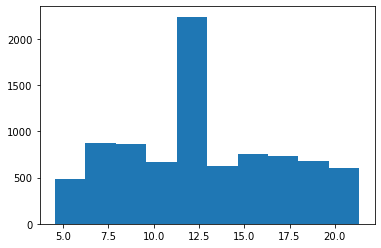

Item_Visibility


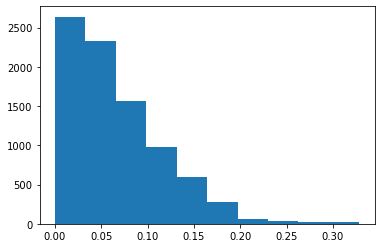

Item_MRP


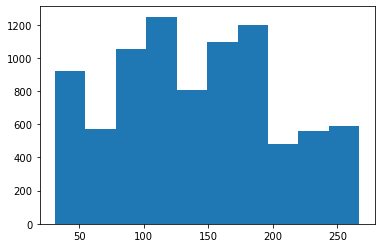

Outlet_Establishment_Year


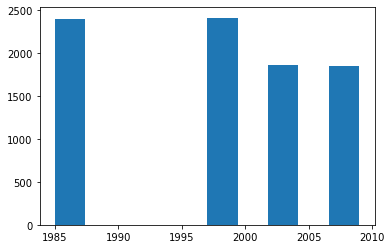

Item_Outlet_Sales


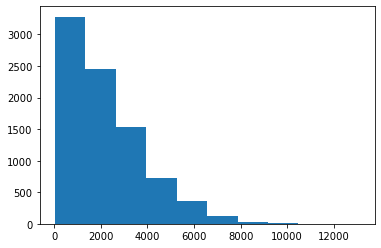

In [12]:
#Distribution of numerical columns
for i in data.select_dtypes(exclude='object').columns:
    print(i)
    plt.hist(data[i])
    plt.show()

In [13]:
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
DRN47     9
FDF52     9
NCB18     9
         ..
FDO33     1
FDE52     1
DRF48     1
FDQ60     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [14]:
#We see that Item_Identifier has two many categories
#It is best to remove the numbers from it
#This will reduce the categories
def letters(val):
    return val[:3]
data['Item_Identifier'] = data['Item_Identifier'].apply(letters)
data['Item_Identifier'].describe()

count     8523
unique      71
top        FDX
freq       295
Name: Item_Identifier, dtype: object

In [15]:
data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [16]:
data['Item_Fat_Content']= data['Item_Fat_Content'].astype(str)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Item_Identifier'] = le.fit_transform(data['Item_Identifier'])

data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])

data['Item_Type'] = le.fit_transform(data['Item_Type'])

data['Outlet_Identifier'] = le.fit_transform(data['Outlet_Identifier'])

data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])

data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type'] = le.fit_transform(data['Outlet_Type'])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,19,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,2,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,32,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,42,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,48,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [21]:
#seperating the features and target variable
X = data.drop(columns='Item_Outlet_Sales', axis=1)
Y = data['Item_Outlet_Sales']

In [22]:
#Splitting the dataset into 70:30

Y = data['Item_Outlet_Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y ,test_size = 0.3, random_state = 10)

print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',Y_train.shape)
print('y_test :',Y_test.shape)

X_train : (5966, 11)
X_test : (2557, 11)
y_train : (5966,)
y_test : (2557,)


In [23]:
# proving statistically

from scipy import stats
sts, p_val = stats.ttest_ind(X_train,X_test)
p_val

array([0.00532436, 0.3610179 , 0.58078712, 0.60885402, 0.58459992,
       0.12085303, 0.09381782, 0.25179144, 0.10491322, 0.22624203,
       0.56241306])

In [24]:
X_train['Item_Weight'].fillna(X_train['Item_Weight'].median(),inplace=True)

C:\Users\DIVYANSHI\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [25]:
features= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Establishment_Year']

In [26]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Xgboost Regressor

In [70]:
def cross_val(model_name,model,X,y,cv):
    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')

In [59]:
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)
y_pred_ = regressor.predict(X_test)

In [60]:
r2_train = metrics.r2_score(Y_test, y_pred_)
r2_train

0.5157639710807684

In [61]:
rmse = MSE(Y_test,y_pred_)**(0.5)
rmse

1187.9633243836556

In [71]:
cross_val(regressor,XGBRegressor(),X,Y,5)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) Scores:
0.55
0.49
0.47
0.52
0.54
Average XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jo

# Random Forest Regressor 

In [63]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

# Fitting the model on our trained dataset.
RF.fit(X_train,Y_train)

# Making Predictions
y_pred = RF.predict(X_test)

In [67]:
cross_val(RF,RandomForestRegressor(),X,Y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.57
0.53
0.53
0.56
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.55


In [69]:
rmse = MAE(Y_test,y_pred)**0.5
rmse

27.844502823079093

# Linear Regression :

In [54]:
LR = LinearRegression(normalize=True)
LR.fit(X_train,Y_train)
y_pred = LR.predict(X_test)


In [55]:
from sklearn.metrics import r2_score
R2 = r2_score(Y_test,y_pred)
R2


0.5089175287239593

In [57]:
rmse  = MAE(Y_test,y_pred)**0.5
rmse

30.011974864627856

In [72]:
cross_val(LR,LinearRegression(),X,Y,5)

LinearRegression(normalize=True) Scores:
0.53
0.51
0.49
0.51
0.51
Average LinearRegression(normalize=True) score: 0.51


# Decision Tree Regressor

In [74]:
DT = DecisionTreeRegressor()
DT.fit(X_train,Y_train)
y_pred = DT.predict(X_test)

In [76]:
rsme = MAE(Y_test,y_pred)**0.5
rmse

27.844502823079093

In [77]:
cross_val(DT,DecisionTreeRegressor(),X,Y,5)

DecisionTreeRegressor() Scores:
0.2
0.11
0.11
0.16
0.22
Average DecisionTreeRegressor() score: 0.16


In [78]:
df = {'Model Name' : ['Xgboost','RandomForest','Linear Regression','Decision tree'],
      'RMSE'       : [1187.963,27.844,30.011,27.844],
      'R2'         : [0.51,0.55,0.51,0.16]}
      

In [80]:
data_ = pd.DataFrame(df)
data_

,Model Name,RMSE,R2
0,Xgboost,1187.963,0.51
1,RandomForest,27.844,0.55
2,Linear Regression,30.011,0.51
3,Decision tree,27.844,0.16


Though the RMSE of Random Forest and Decision is same but R2 of Random Forest is higher so we can say 
Random forest is the best fit model.